# Edades del universo

#### Hugo Rivera Morales
#### Cosmología

In [1]:
#Paqueterias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd
import decimal  

In [2]:
# Constantes
# Setting different cosmologies
Ok0 = np.array((0, 0, 0, 0))
Om0 = np.array((1, 0.3, 0.3, 0))
Or0 = np.array((0, 0, 1e-4, 1))
Ol0 = np.array((1, 1, 1, 1)) - Om0 - Or0 - Ok0
H0 = 70.0 # km/(s*Mpc)
c = 300000000 # m/s
a = 979.6825 # Factor to convert to Gyr
# CPL models
omega_0 = -1.5
omega_a = 0.5
# Polynomial-CDM
Om1 = -0.2
Om2 = 0.2

### 1) Modelos $\Lambda\text{CDM}$:

La integral a resolver para este caso es la siguiente, recordando que para el tiempo presente, $a_0 = 1$

$$t = \frac{1}{H_0}\int^{a_0}_{0} \frac{x}{\sqrt{\Omega_{\Lambda,0}x^4 + \Omega_{k,0}x^2 + \Omega_{m,0}x + \Omega_{r,0}}}dx$$

In [3]:
# Integral
def  time_LCDM(Om0, Or0, Ol0, Ok0):
    def t_0(x):
        t_0 = x/(H0*np.sqrt(Or0 + Om0*x + Ol0*x**4 + Ok0*x**2))
        return t_0
    f1 = quad(t_0, 0, 1)
# Conversión
    time = a*float(f1[0]) # Se le pone f[0] por q f es un array, del valor y de su error
    return time
# Array with the ages of the universe for different cosmologies
t_LCDM = np.zeros(Om0.shape[0])
for i in range(Om0.shape[0]):
    t_LCDM[i] = time_LCDM(Om0[i],Or0[i],Ol0[i],Ok0[i])

### 2) Modelos $\text{CLP}$: $\omega_{\Lambda}(z) = \omega_0 + \omega_af(z)$

##### Para el caso: $f(z) = \frac{z}{1 + z}$

La integral a resolver para este caso es la siguiente:

$$t = \frac{1}{H_0}\int^{a_0}_{0} \frac{x}{\sqrt{\Omega_{k,0}x^2 + \Omega_{m,0}x + \Omega_{r,0} + \Omega_{\Lambda,0}e^{-3w_a(1-x)}x^{-3(w_0 + w_a) + 1}}}dx$$

In [4]:
# Integral
def  time_CLP1(Om0, Or0, Ol0, Ok0):
    def t_0(x):
        t_0 = x/(H0*np.sqrt(Or0 + Om0*x + Ok0*x**2 + Ol0*x**(-3*(omega_0 + omega_a) + 1)*np.exp(-3*omega_a*(1 - x))))
        return t_0
    f1 = quad(t_0, 0, 1)
# Conversión
    time = a*float(f1[0])
    return time
# Array with the ages of the universe for different cosmologies
t_CLP1 = np.zeros(Om0.shape[0])
for i in range(Om0.shape[0]):
    t_CLP1[i] = time_CLP1(Om0[i],Or0[i],Ol0[i],Ok0[i])

##### Para el caso: $f(z) = \ln(1+z)$:

La integral a resolver para este caso es la siguiente:

$$t = \frac{1}{H_0}\int^{a_0}_{0} \frac{x}{\sqrt{\Omega_{k,0}x^2 + \Omega_{m,0}x + \Omega_{r,0} + \Omega_{\Lambda,0}x^{-3(w_0 - \frac{1}{2}w_a\ln x) + 1}}}dx$$

In [5]:
# Integral
def  time_CLP2(Om0, Or0, Ol0, Ok0):
    def t_0(x):
        t_0 = x/(H0*np.sqrt(Or0 + Om0*x + Ok0*x**2 + (Ol0*x**(-3*(omega_0 - 0.5*omega_a*np.log(x)) + 1))))
        return t_0
    f1 = quad(t_0, 0, 1)
# Conversión
    time = a*float(f1[0])
    return time
# Array with the ages of the universe for different cosmologies
t_CLP2 = np.zeros(Om0.shape[0])
for i in range(Om0.shape[0]):
    t_CLP2[i] = time_CLP2(Om0[i],Or0[i],Ol0[i],Ok0[i])

### 3) Modelos $\text{Polynomial-CDM}$:

La integral a resolver para este caso es la siguiente:

$$t = \frac{1}{H_0}\int^{a_0}_{0} \frac{x}{\sqrt{\Omega_{r,0} + \Omega_{m,0}x + (\Omega_{k,0} + \Omega_{1,0})x^2 + \Omega_{2,0}x^3 + (1 - \Omega_{m,0} - \Omega_{r,0} - \Omega_{k,0} - \Omega_{1,0} - \Omega_{2,0})x^4}}dx$$

In [6]:
# # Integral
def  time_PCDM(Om0, Or0, Ok0):
    def t_0(x):
        t_0 = x/(H0*np.sqrt(Or0 + Om0*x + (Ok0 + Om1)*x**2 + Om2*x**3 + (1 - Or0 - Om0 - Om1 - Om2)*x**4))
        return t_0
    f1 = quad(t_0, 0, 1)
# Conversión
    time = a*float(f1[0])
    return time
# Array with the ages of the universe for different cosmologies
t_PCDM = np.zeros(Om0.shape[0])
for i in range(Om0.shape[0]):
    t_PCDM[i] = time_PCDM(Om0[i],Or0[i],Ok0[i])

## 4) Comparación de modelos

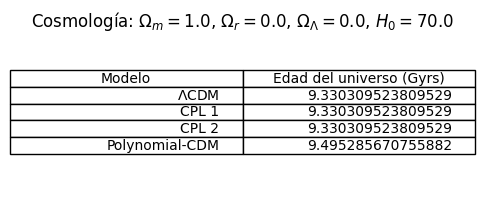

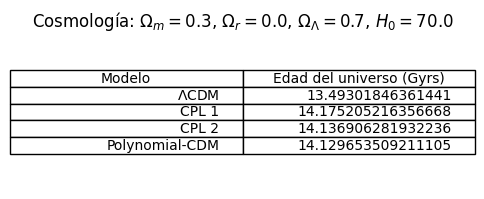

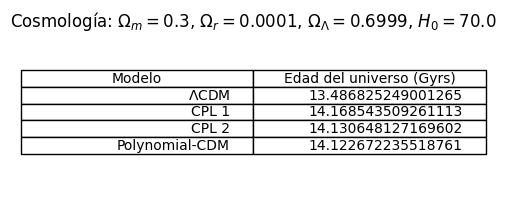

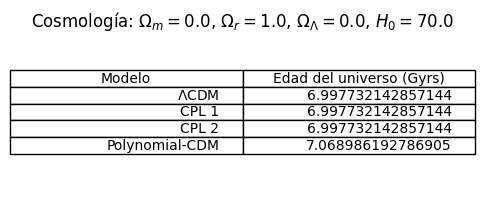

In [7]:
for i in range(Om0.shape[0]):
    my_frame = pd.DataFrame(data={'Modelo':['$\\Lambda$CDM', 'CPL 1', 'CPL 2', 'Polynomial-CDM'],
                              'Edad del universo (Gyrs)':[t_LCDM[i], t_CLP1[i], t_CLP2[i], t_PCDM[i]]})
    fig = plt.figure(figsize = (6, 2))
    ax = fig.add_subplot(111)
    ax.table(cellText = my_frame.values,
          colLabels = my_frame.columns,
          loc = "center"
         )
    ax.set_title(f"Cosmología: $\\Omega_m = {Om0[i]}$, $\\Omega_r = {Or0[i]}$, " "$\\Omega_\\Lambda =$" f"{Ol0[i]}, $H_0 = {H0}$")
    ax.axis("off");